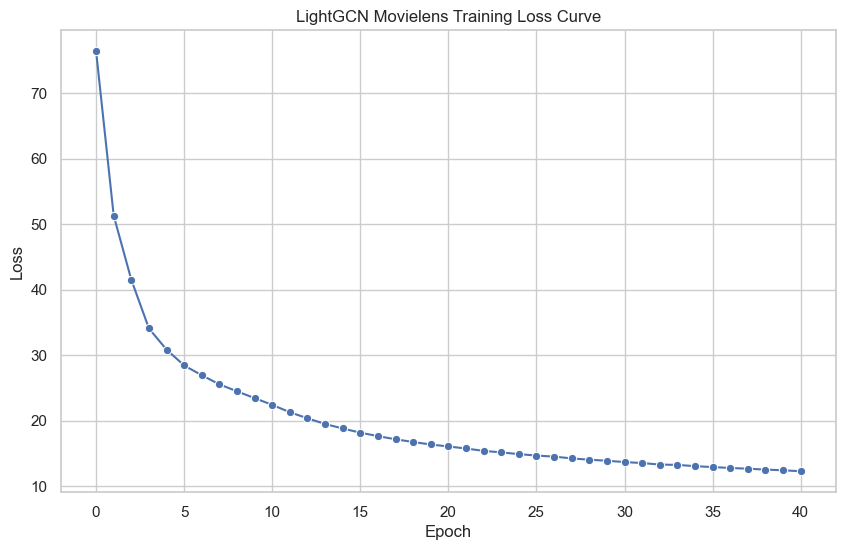

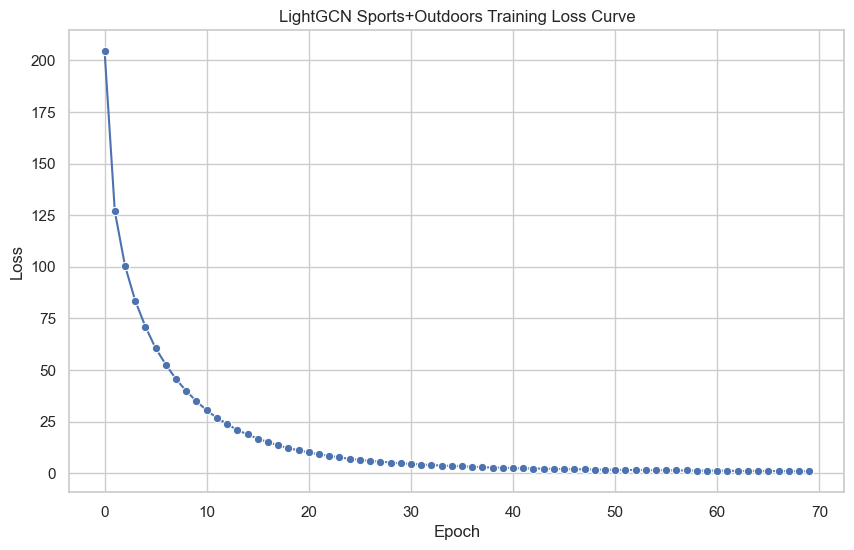

In [4]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the log content
with open('../log/LightGCN/LightGCN-movielens-32m_train-Jan-04-2026_14-59-00-0949ce.txt', 'r') as f:
    log_text_movielens = f.read()

with open('../log/LightGCN/LightGCN-sports_5core_ver0.4_log.txt', 'r') as f:
    log_text_sports = f.read()

# Extract epoch number and train loss using regex
# Matches "epoch X training ... train loss: Y"
data_ml = re.findall(r"epoch (\d+) training \[.*train loss: ([\d.]+)", log_text_movielens)
data_sp = re.findall(r"epoch (\d+) training \[.*train loss: ([\d.]+)", log_text_sports)

# Convert to DataFrame
df_ml = pd.DataFrame(data_ml, columns=['Epoch', 'Loss']).astype(float)
df_sp = pd.DataFrame(data_sp, columns=['Epoch', 'Loss']).astype(float)

# Plot using Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ml, x='Epoch', y='Loss', marker='o').set(title='LightGCN Movielens Training Loss Curve')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sp, x='Epoch', y='Loss', marker='o').set(title='LightGCN Sports+Outdoors Training Loss Curve')
plt.show()

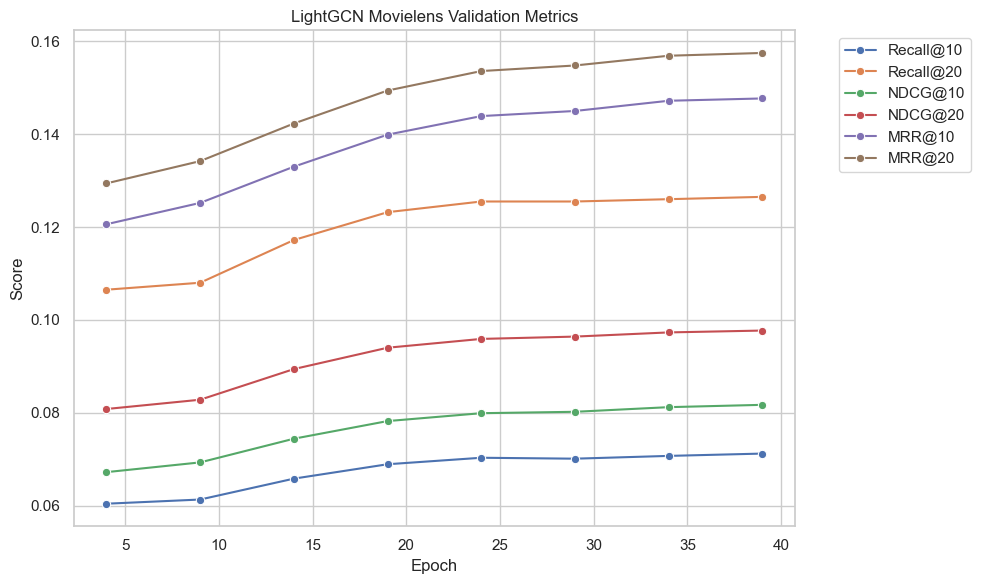

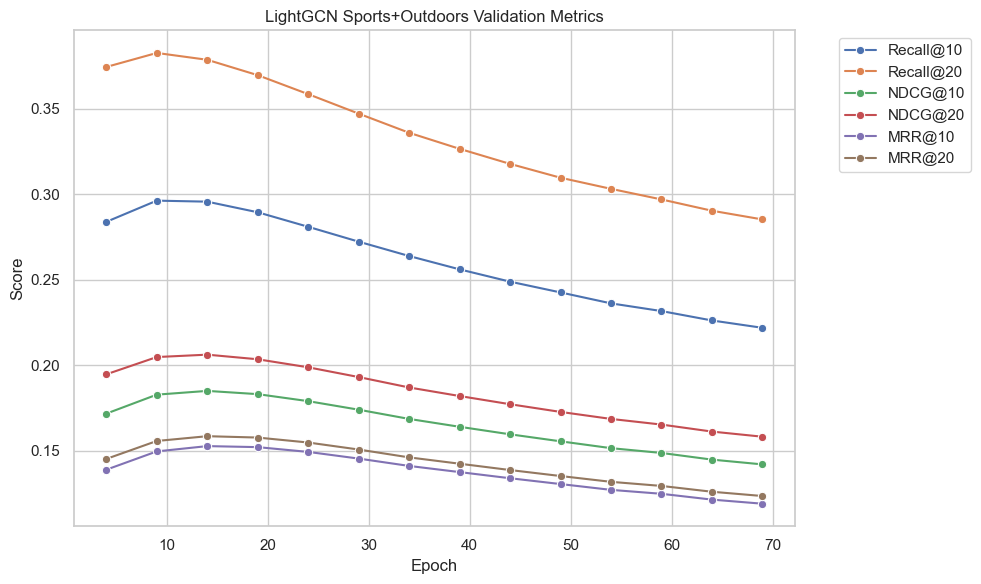

In [5]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def parse_validation_metrics(log_text):
    # Extract epoch numbers from evaluation lines
    epochs = re.findall(r"epoch (\d+) evaluating", log_text)
    # Extract the metrics line (Recall, NDCG, MRR at @10 and @20)
    metrics = re.findall(r"recall@10 : ([\d.]+)\s+recall@20 : ([\d.]+)\s+ndcg@10 : ([\d.]+)\s+ndcg@20 : ([\d.]+)\s+mrr@10 : ([\d.]+)\s+mrr@20 : ([\d.]+)", log_text)

    df = pd.DataFrame(metrics, columns=['Recall@10', 'Recall@20', 'NDCG@10', 'NDCG@20', 'MRR@10', 'MRR@20']).astype(float)
    df.insert(0, 'Epoch', [int(e) for e in epochs])
    return df

# Parse validation results for both datasets
df_valid_ml = parse_validation_metrics(log_text_movielens)
df_valid_sp = parse_validation_metrics(log_text_sports)

# Plotting helper for multiple metrics
for df, title in [(df_valid_ml, "LightGCN Movielens Validation Metrics"),
                  (df_valid_sp, "LightGCN Sports+Outdoors Validation Metrics")]:
    # Melt the dataframe for seaborn hue plotting
    df_melted = df.melt(id_vars='Epoch', var_name='Metric', value_name='Score')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_melted, x='Epoch', y='Score', hue='Metric', marker='o').set(title=title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()